In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

### 1. Import The data

In [2]:
news_data = pd.read_excel(
r'C:\Users\ASUS\Documents\python\Data Science\Project\WebScrapping\Stock_Market_News.xlsx', 
sheet_name = 'Stock Market News'
)
news_data

,ticker,date,time,title
0,AAPL,Oct-27-22,07:00AM,Dow Jones Futures: Meta Continues Tech Titan M...
1,AAPL,Oct-27-22,06:00AM,Big tech stocks will be key for the current ra...
2,AAPL,Oct-27-22,05:30AM,Apple Set to Report Record Revenue as Investor...
3,AAPL,Oct-27-22,04:06AM,Foxconn iPhone factory in China reels from Cov...
4,AAPL,Oct-27-22,12:01AM,Apple Earnings Are on Deck as Consumer Demand ...
...,...,...,...,...
695,TSLA,Oct-24-22,07:03AM,Tesla cuts prices for some vehicles in China: ...
696,TSLA,Oct-24-22,06:11AM,Cathie Wood Is Buying Tesla Again. 3 Reasons Y...
697,TSLA,Oct-24-22,05:48AM,Exclusive-Toyota scrambles for EV reboot with ...
698,TSLA,Oct-24-22,05:47AM,Tesla Stock Slides As Surprise China Price Cut...


In [3]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ticker  700 non-null    object
 1   date    700 non-null    object
 2   time    700 non-null    object
 3   title   700 non-null    object
dtypes: object(4)
memory usage: 22.0+ KB


In [4]:
# changing date and time colums into 'date-time' types
news_data['date'] =  pd.to_datetime(news_data['date'], infer_datetime_format=False)

# rechecking data types
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ticker  700 non-null    object        
 1   date    700 non-null    datetime64[ns]
 2   time    700 non-null    object        
 3   title   700 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 22.0+ KB


In [5]:
# defining month for slicing dataset
month = news_data['date'].dt.month
month.value_counts()

10    654
9      45
8       1
Name: date, dtype: int64

In [6]:
# using the only October news (month == 10)
newest_news = news_data[(month == 10)]
newest_news

,ticker,date,time,title
0,AAPL,2022-10-27,07:00AM,Dow Jones Futures: Meta Continues Tech Titan M...
1,AAPL,2022-10-27,06:00AM,Big tech stocks will be key for the current ra...
2,AAPL,2022-10-27,05:30AM,Apple Set to Report Record Revenue as Investor...
3,AAPL,2022-10-27,04:06AM,Foxconn iPhone factory in China reels from Cov...
4,AAPL,2022-10-27,12:01AM,Apple Earnings Are on Deck as Consumer Demand ...
...,...,...,...,...
695,TSLA,2022-10-24,07:03AM,Tesla cuts prices for some vehicles in China: ...
696,TSLA,2022-10-24,06:11AM,Cathie Wood Is Buying Tesla Again. 3 Reasons Y...
697,TSLA,2022-10-24,05:48AM,Exclusive-Toyota scrambles for EV reboot with ...
698,TSLA,2022-10-24,05:47AM,Tesla Stock Slides As Surprise China Price Cut...


In [7]:
tickers = newest_news['ticker'].unique().tolist()
tickers 

['AAPL', 'MSFT', 'NVDA', 'CSCO', 'GOOG', 'AMZN', 'TSLA']

### 2. Sentiment Analysis 
##### Using Vader and Wordcloud

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

analyzer = SentimentIntensityAnalyzer()
stopwords = set(STOPWORDS)

In [9]:
# to generate wordcloud 
def get_wordcloud(ticker, comment_words):
    for words in ticker['title']:
        # typecaste words to string 
        words = str(words)
        # split the value 
        tokens = words.split()
        # lower case each tokens
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
    # plot wordcloud 
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [10]:
# vader sentiment analysis
mean_compound = []
def get_vadersentiment(ticker):
    score_ticker = []
    sentences = ticker['title'].tolist()

    for sentence in sentences:
        score = analyzer.polarity_scores(sentence)
        score_ticker.append(score)
    # create dataframe
    df_ticker_score = pd.DataFrame(score_ticker)
    df_ticker_score
    mean_compound_ticker = df_ticker_score['compound'].mean()
    # apple distributions compund
    plt.figure(figsize=(8,5))
    plt.title(str(ticker['ticker'].unique().tolist()[0]) + ' Compound Score Distribution')
    sns.histplot(df_ticker_score['compound'])
    plt.grid(linewidth = 0.5)
    plt.axvline(x = mean_compound_ticker, color='r', ls = '--', label = 'Mean Compound')
    plt.legend(loc = 'upper right')
    plt.show()
    return mean_compound.append(mean_compound_ticker)

A. AAPL 

In [11]:
apple = newest_news[(newest_news['ticker']=='AAPL')]
apple

,ticker,date,time,title
0,AAPL,2022-10-27,07:00AM,Dow Jones Futures: Meta Continues Tech Titan M...
1,AAPL,2022-10-27,06:00AM,Big tech stocks will be key for the current ra...
2,AAPL,2022-10-27,05:30AM,Apple Set to Report Record Revenue as Investor...
3,AAPL,2022-10-27,04:06AM,Foxconn iPhone factory in China reels from Cov...
4,AAPL,2022-10-27,12:01AM,Apple Earnings Are on Deck as Consumer Demand ...
...,...,...,...,...
95,AAPL,2022-10-24,08:25AM,Dow Jones Futures Signal Market Rally To Exten...
96,AAPL,2022-10-24,07:00AM,"Buy An Apple iPhone, Fund Mangrove Restoration..."
97,AAPL,2022-10-24,12:00AM,TSMC: the Taiwanese chipmaker caught up in the...
98,AAPL,2022-10-23,08:39PM,"Dow Jones Futures Rise: Market Rally Roars, 5 ..."


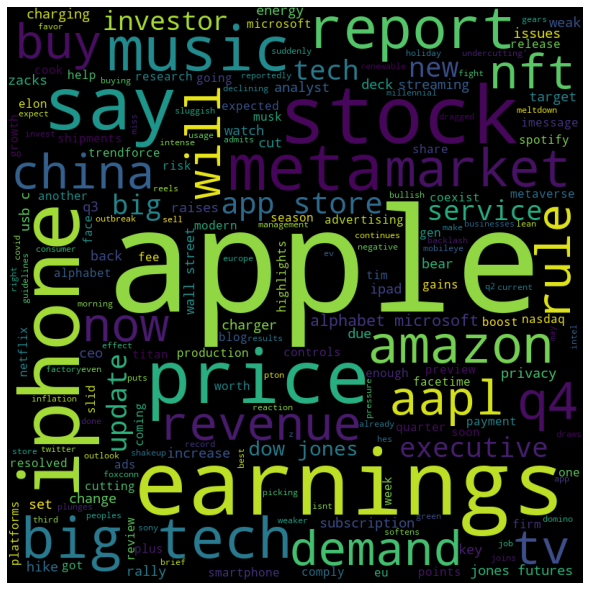

In [12]:
comment_words_apple = ''
get_wordcloud(apple, comment_words_apple)

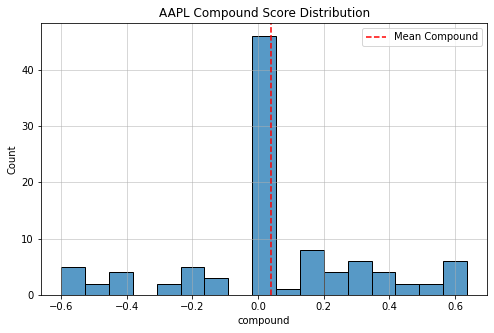

In [13]:
get_vadersentiment(apple)

B. Microsoft

In [14]:
microsoft = newest_news[(newest_news['ticker'] == 'MSFT')]
microsoft

,ticker,date,time,title
100,MSFT,2022-10-27,07:00AM,Dow Jones Futures: Meta Continues Tech Titan M...
101,MSFT,2022-10-27,06:00AM,Big tech stocks will be key for the current ra...
102,MSFT,2022-10-27,04:00AM,FTSE 100 muted as investors await ECB interest...
103,MSFT,2022-10-26,11:17PM,Samsung Electronics Feels Sting of Memory-Chip...
104,MSFT,2022-10-26,05:32PM,Microsofts and Alphabets Post-Earnings Sell-Of...
...,...,...,...,...
195,MSFT,2022-10-25,10:06AM,3 Cybersecurity ETFs for 2022 -- One Has Easil...
196,MSFT,2022-10-25,09:41AM,"Alphabet, Microsoft Lead Bear-Market Earnings ..."
197,MSFT,2022-10-25,09:31AM,"Company News for Oct 25, 2022"
198,MSFT,2022-10-25,09:17AM,"The Zacks Analyst Blog Highlights Microsoft, A..."


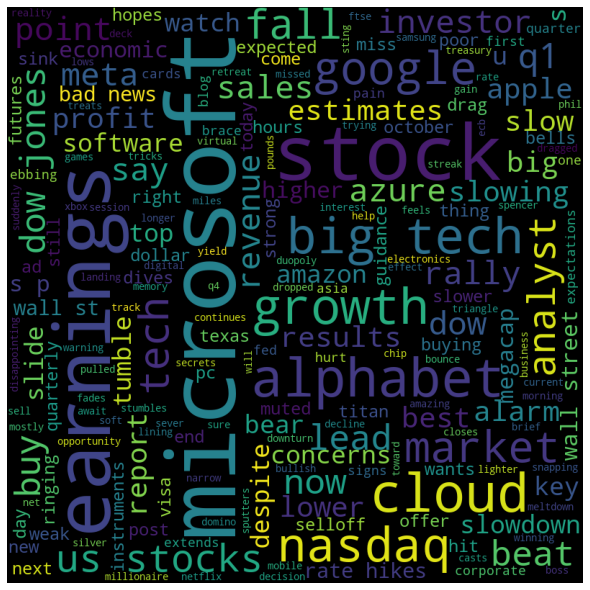

In [15]:
comment_words_microsoft=''
get_wordcloud(microsoft, comment_words_microsoft)

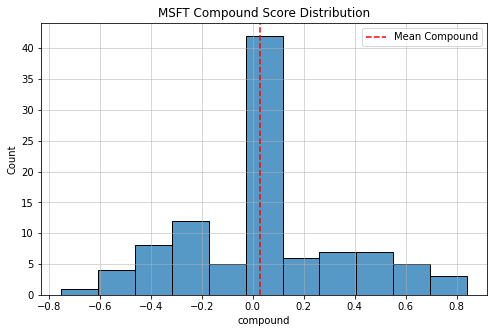

In [16]:
# vader sentiment analysis
get_vadersentiment(microsoft)

C. NVIDIA

In [17]:
nvidia = newest_news[(newest_news['ticker'] == 'NVDA')]
nvidia

,ticker,date,time,title
200,NVDA,2022-10-27,06:04AM,Where Will Intel Stock Be in 5 Years?
201,NVDA,2022-10-27,06:00AM,Big tech stocks will be key for the current ra...
202,NVDA,2022-10-27,05:46AM,Metas Increased Spending Is Good News for Nvid...
203,NVDA,2022-10-27,05:30AM,Better Growth Stock: Tesla vs. Nvidia
204,NVDA,2022-10-26,05:32PM,Nvidia Leads Chip Stocks Higher on Metas Plann...
...,...,...,...,...
295,NVDA,2022-10-11,01:05PM,Why Nvidia Fell Again Today but Tried to Recover
296,NVDA,2022-10-11,09:45AM,3 of the Top-Growing Stocks on Earth
297,NVDA,2022-10-11,09:30AM,"Why Qualcomm, Nvidia, and Other Semiconductor ..."
298,NVDA,2022-10-11,08:29AM,"The Zacks Analyst Blog Highlights NVIDIA, Pfiz..."


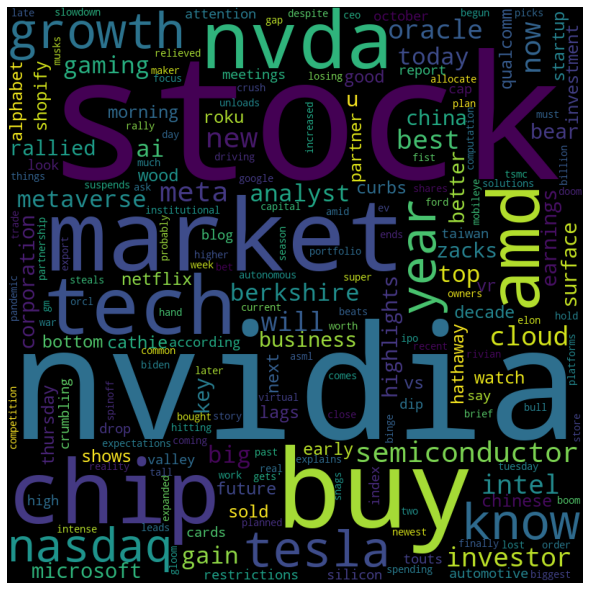

In [18]:
# wordcloud
comment_words_nvidia = ''
get_wordcloud(nvidia, comment_words_nvidia)

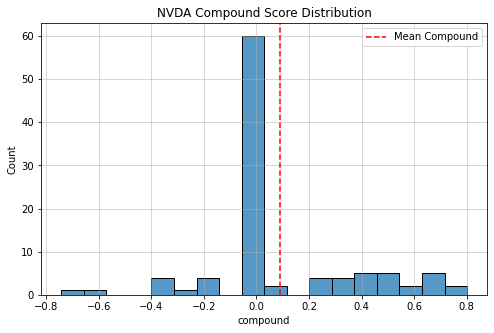

In [19]:
# vader sentiment analysis
get_vadersentiment(nvidia)

D. Cisco

In [20]:
cisco = newest_news[(newest_news['ticker'] == 'CSCO')]
cisco.head()

,ticker,date,time,title
300,CSCO,2022-10-26,05:45PM,Cisco Systems (CSCO) Gains As Market Dips: Wha...
301,CSCO,2022-10-26,11:30AM,Webex by Cisco Enhances Customer Experiences f...
302,CSCO,2022-10-25,03:01PM,"IBM, Lenovo, Cisco and Wolfspeed lead the char..."
303,CSCO,2022-10-25,11:30AM,Webex by Cisco Advances Hybrid Work with Break...
304,CSCO,2022-10-25,09:35AM,Working Trees: How a Startup Helps Farmers Get...


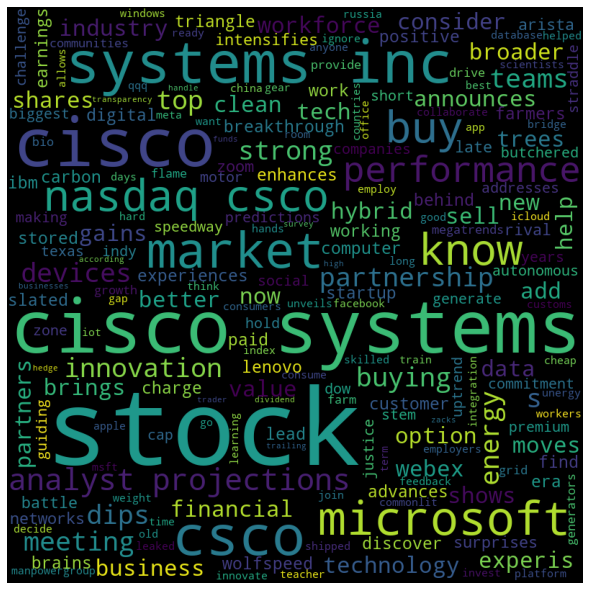

In [21]:
# wordcloud
comment_words_cisco = ''
get_wordcloud(cisco, comment_words_cisco)

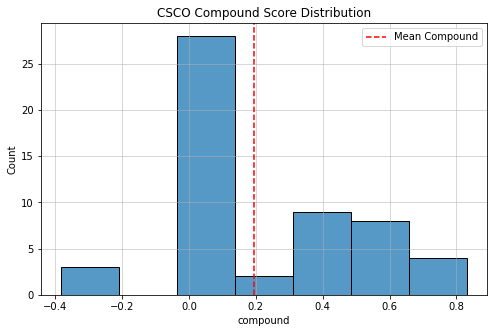

In [22]:
# vader sentiment analysis
get_vadersentiment(cisco)

5. Google

In [23]:
google = newest_news[(newest_news['ticker'] == 'GOOG')]
google

,ticker,date,time,title
400,GOOG,2022-10-27,07:00AM,Is It Game Over for Microsoft and Alphabet Sto...
401,GOOG,2022-10-27,06:00AM,Big tech stocks will be key for the current ra...
402,GOOG,2022-10-27,05:44AM,2 Beaten Down Software Stocks That Look Like G...
403,GOOG,2022-10-27,05:18AM,Is Alphabet Stock a Buy Now?
404,GOOG,2022-10-27,04:00AM,FTSE 100 muted as investors await ECB interest...
...,...,...,...,...
495,GOOG,2022-10-25,04:05PM,Google misses on expectations as YouTube ad re...
496,GOOG,2022-10-25,04:04PM,Google-parent Alphabet misses estimates for qu...
497,GOOG,2022-10-25,03:24PM,10 Best Stocks Under $10 To Buy Right Now
498,GOOG,2022-10-25,02:58PM,"Earthquake rattles Silicon Valley, San Francisco"


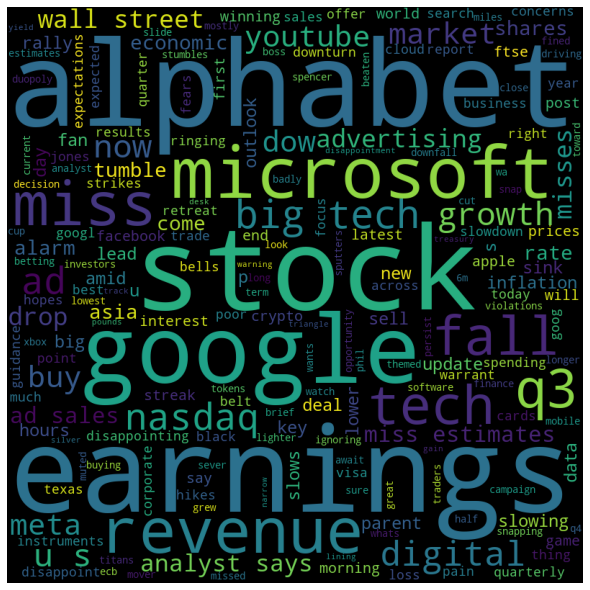

In [24]:
# wordcloud
comment_words_google = ''
get_wordcloud(google, comment_words_google)

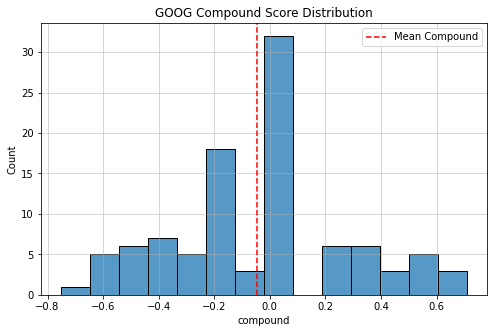

In [25]:
get_vadersentiment(google)

6. Amazon 

In [26]:
amazon = newest_news[(newest_news['ticker'] == 'AMZN')]
amazon

,ticker,date,time,title
500,AMZN,2022-10-27,06:30AM,Shopify Stock: Bear vs. Bull
501,AMZN,2022-10-27,06:21AM,2 Explosive Growth Stocks to Buy in 2022 and B...
502,AMZN,2022-10-27,06:00AM,Big tech stocks will be key for the current ra...
503,AMZN,2022-10-27,05:30AM,Amazon Earnings Expected to Recover Even as In...
504,AMZN,2022-10-27,05:18AM,Is Alphabet Stock a Buy Now?
...,...,...,...,...
595,AMZN,2022-10-21,11:29AM,Tesco meal deal: How much has the price increa...
596,AMZN,2022-10-21,10:44AM,Amazon to Use Airbus Cargo Planes for First Time
597,AMZN,2022-10-21,10:28AM,3 Retail Pharmacy and Drugstore Stocks to Watc...
598,AMZN,2022-10-21,10:05AM,What Lies Ahead for Big Tech ETFs in Q3 Earnings?


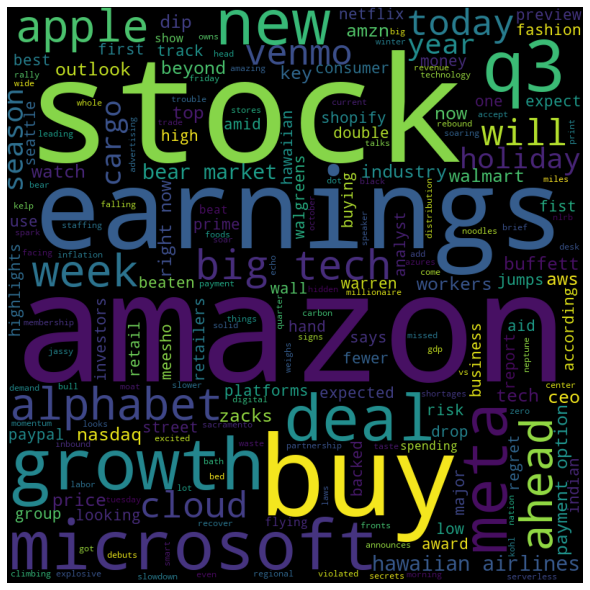

In [27]:
 # wordcloud
comment_words_amazon = ''
get_wordcloud(amazon, comment_words_amazon)

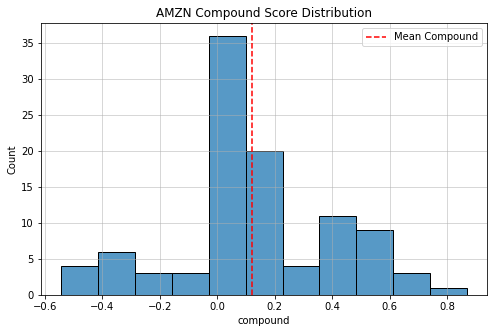

In [28]:
get_vadersentiment(amazon)

7. Tesla 

In [29]:
tesla = newest_news[(newest_news['ticker'] == 'TSLA')]
tesla

,ticker,date,time,title
600,TSLA,2022-10-27,07:00AM,Dow Jones Futures: Meta Continues Tech Titan M...
601,TSLA,2022-10-27,07:00AM,What's Going On With Tesla Stock?
602,TSLA,2022-10-27,06:05AM,"Twitter Stock Nears Elon Musk Takeover Price, ..."
603,TSLA,2022-10-27,06:00AM,Big tech stocks will be key for the current ra...
604,TSLA,2022-10-27,05:43AM,Elon Musk latest: Twitter users prepare to del...
...,...,...,...,...
695,TSLA,2022-10-24,07:03AM,Tesla cuts prices for some vehicles in China: ...
696,TSLA,2022-10-24,06:11AM,Cathie Wood Is Buying Tesla Again. 3 Reasons Y...
697,TSLA,2022-10-24,05:48AM,Exclusive-Toyota scrambles for EV reboot with ...
698,TSLA,2022-10-24,05:47AM,Tesla Stock Slides As Surprise China Price Cut...


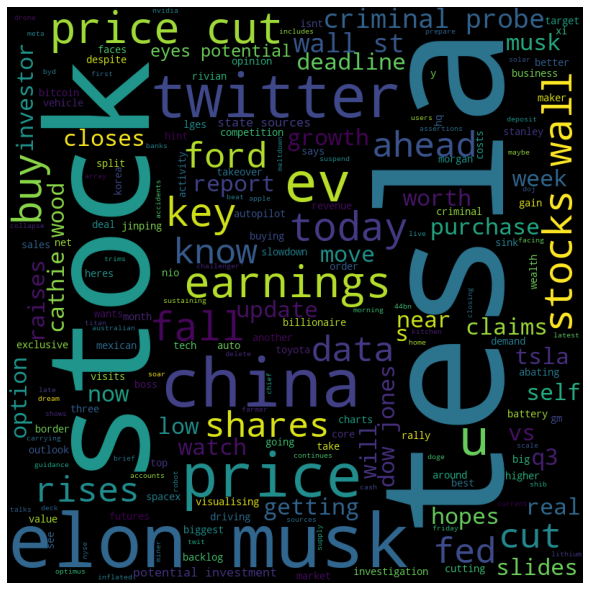

In [30]:
# wordcloud
comment_words_tesla = ''
get_wordcloud(tesla, comment_words_tesla)

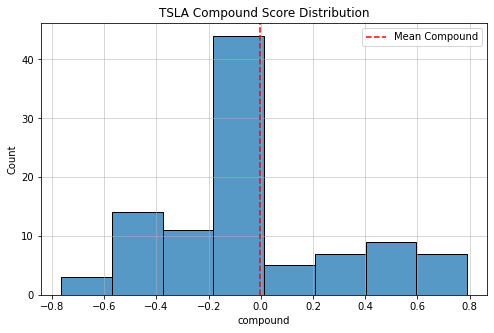

In [31]:
get_vadersentiment(tesla)

### 3. Comparison 

In [32]:
mean_compound = {
    'Tickers' : tickers,
    'Mean Compound' : mean_compound
}

In [33]:
mean_compound_df = pd.DataFrame(mean_compound)
mean_compound_df

,Tickers,Mean Compound
0,AAPL,0.039508
1,MSFT,0.029816
2,NVDA,0.090871
3,CSCO,0.193630
4,GOOG,-0.045331
5,AMZN,0.119599
6,TSLA,-0.001620


In [34]:
mean_compound_df['Mean Compound'] = mean_compound_df['Mean Compound'].round(4)

In [35]:
mean_compound_df

,Tickers,Mean Compound
0,AAPL,0.0395
1,MSFT,0.0298
2,NVDA,0.0909
3,CSCO,0.1936
4,GOOG,-0.0453
5,AMZN,0.1196
6,TSLA,-0.0016


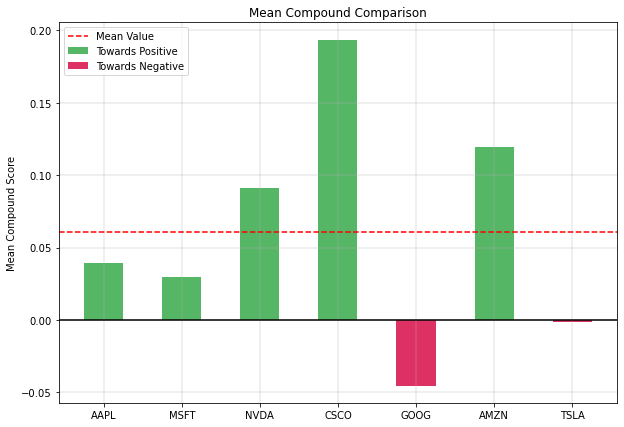

In [36]:
neg_mean = mean_compound_df[(mean_compound_df['Mean Compound'] < 0)]
# plot the mean compouns of each ticker 
plt.figure(figsize=(10,7))
plt.bar(mean_compound_df['Tickers'],mean_compound_df['Mean Compound'], width = 0.5, color = '#55B666',
       label = 'Towards Positive')
plt.bar(neg_mean['Tickers'],neg_mean['Mean Compound'], width = 0.5, color = '#DE3163',
       label = 'Towards Negative')
plt.axhline(0, color = 'black')
plt.axhline(mean_compound_df['Mean Compound'].mean(), color = 'r', ls = '--', label = 'Mean Value')
plt.grid(linewidth = 0.4)
plt.title('Mean Compound Comparison')
plt.ylabel('Mean Compound Score')
plt.legend(loc = 'upper left')
plt.show()
